In [25]:
# data received from https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/

In [26]:
import pandas as pd

# %%timeit

In [27]:
# reading and reducing dataset

path = '../data/2019-20_pbp.csv'

df = pd.read_csv(path)

outcome = df[df['AwayPlay']=='End of Game']

outcome = outcome[outcome['GameType']=='regular']

col_wanted=['GameType','Date', 'WinningTeam', 'AwayTeam', 'AwayScore', 'HomeTeam', 'HomeScore']

outcome = outcome[col_wanted]

outcome.to_csv(path[0:-8] + '_outcome.csv')

outcome.reset_index(drop=True, inplace=True)

outcome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060 entries, 0 to 1059
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   GameType     1060 non-null   object
 1   Date         1060 non-null   object
 2   WinningTeam  1060 non-null   object
 3   AwayTeam     1060 non-null   object
 4   AwayScore    1060 non-null   int64 
 5   HomeTeam     1060 non-null   object
 6   HomeScore    1060 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 58.1+ KB


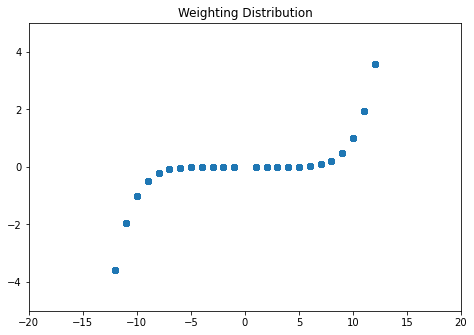

In [28]:
import matplotlib.pyplot as plt
import numpy as np

weight=0.1
scale=7

samples=len(outcome)

blow_out=15

away_score=[i for i in outcome['AwayScore'][0:samples]]
home_score=[i for i in outcome['HomeScore'][0:samples]]
# difference=[i-home_score for i in away_score]
difference=[away_score[i]-home_score[i] for i in range(len(away_score))]
for i in range(len(difference)):
    if difference[i]>blow_out:
        difference[i]= blow_out
    elif difference[i] < (-blow_out):
        difference[i] = -blow_out
weighted=[weight*i for i in difference]
scaled=[i**scale for i in weighted]


fig = plt.figure()
a1 = fig.add_axes([0,0,1,1])
a1.plot(difference, scaled, 'o')
a1.set_title('Weighting Distribution')
a1.set_ylim(-5,5)
a1.set_xlim(-20,20)
# a1.set_xlim(85,115)
plt.show()

In [29]:
outcome['Weighted_Result']=scaled

In [30]:
def unique(list1):
 
    # initialize a null list
    unique_list = []
     
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return unique_list

In [31]:
teams=unique(outcome['HomeTeam'])

team_results=[]
for i in range(len(teams)):#len(teams)):
    team_total=0
    for j in range(len(outcome)):
        if outcome['AwayTeam'][j]==teams[i]: 
            team_total+=outcome['Weighted_Result'][j]
        elif outcome['HomeTeam'][j]==teams[i]:
            team_total-=outcome['Weighted_Result'][j]
    #print(teams[i] + ':  ' + str(team_total))
    team_results.append(team_total)

In [32]:
 # initialise data of lists.
data = {'Team':teams, 'Weighted_Result':team_results}
 
# Create DataFrame
df_export = pd.DataFrame(data)

In [33]:
average_point_dif_win=[]
average_point_dif_loss=[]

for i in range(len(teams)):#len(teams)):
    team_dif_win=0
    team_dif_loss=0
    total_games_win=0
    total_games_loss=0
    for j in range(len(outcome)):
        if outcome['AwayTeam'][j]==teams[i]:
            if outcome['AwayScore'][j]>outcome['HomeScore'][j]:
                team_dif_win+= (outcome['AwayScore'][j]-outcome['HomeScore'][j])
                total_games_win+=1
            else:
                team_dif_loss += (outcome['AwayScore'][j]-outcome['HomeScore'][j])
                total_games_loss+=1
        elif outcome['HomeTeam'][j]==teams[i]:
            if outcome['AwayScore'][j]<outcome['HomeScore'][j]:
                team_dif_win+= (outcome['HomeScore'][j]-outcome['AwayScore'][j])
                total_games_win+=1
            else:
                team_dif_loss += (outcome['HomeScore'][j]-outcome['AwayScore'][j])
                total_games_loss+=1
    
    average_point_dif_win.append(team_dif_win/total_games_win)
    average_point_dif_loss.append(team_dif_loss/total_games_loss)
    
df_export['Average_Point_Dif_Win']=average_point_dif_win
df_export['Average_Point_Dif_Loss']=average_point_dif_loss

In [37]:
df_export.sort_values(by=['Weighted_Result'], ascending=False, inplace=True)
df_export.reset_index(drop=True, inplace=True)

print(df_export)
df_export.to_csv(path[0:-8] + '_calculation_results.csv')

   Team  Weighted_Result  Average_Point_Dif_Win  Average_Point_Dif_Loss
0   MIL       439.706858              15.946429               -9.235294
1   LAC       348.321409              14.428571              -10.565217
2   BOS       273.650894              13.000000               -7.083333
3   DAL       232.194466              14.139535               -7.406250
4   TOR       225.091927              11.773585               -9.210526
5   LAL       188.826038              12.288462              -12.000000
6   MIA       129.742797              11.477273              -10.000000
7   HOU        99.083438              12.431818              -11.928571
8   OKC        92.871830              10.159091              -10.857143
9   UTA        73.955385              10.295455               -9.821429
10  PHI        50.193621              11.255814              -10.333333
11  IND        39.581105              10.511111              -11.785714
12  DEN        28.277698               9.543478              -10